# Managing and analyzing chromatograpfic data

In [27]:
from chromatopy.tools import ChromAnalyzer
from chromatopy.tools.calibration import Calibrator

## Experimental scenario

The chromatograpfic experiments of a day consists of the following measurements:
1. 10 samples of a substrate standard in the concentration range of 0.05 to 1 $mmol \cdot L^{-1}$
2. Kinetic measurements
    - 6 samples of a substrate with an inital concentration of 1.78 $mmol \cdot L^{-1}$ and co-substrate of 10 $mmol \cdot L^{-1}$
    - 6 samples of a substrate with an inital concentration of 3.12 $mmol \cdot L^{-1}$ and co-substrate of 10 $mmol \cdot L^{-1}$

Samples were taken in 1 min intervals for 5 min.

### Retention time table

| Species | Retention time (min) |
|---------|-----------------------|
| Oxaloacetate | 21.35 |
| Acetyl-CoA | - |
| Citrate | 22.67 |

### Chebi ID table
| Species | Chebi ID |
|---------|----------|
| Oxaloacetate | 16452 |
| Acetyl-CoA | 15351 |
| Citrate | 30769 |


## Data preparation

All output files of the HPLC are deposited in `data` folder. Therein, the calibration data is located in `calibration` folder and the kinetic data in `kinetic` folder. Each folder within `kinetic` contains the measurement data for the time-course series of one experimental condition.

In [28]:
# Define retention times
ret_oxaloacetate = 21.35
ret_citrate = 22.67

# Define Chebi IDs
chebi_oxaloacetate = 16452
chebi_acecoa = 15351
chebi_citrate = 30769

### Calibration data

In [29]:
# Define data paths
calibration_path = "data/calibration"

# Load data with ChromAnalyzer
calib_analyzer = ChromAnalyzer.read_data(calibration_path)

# plot the calibration data
calib_analyzer.plot_measurements()

After all files from the `calibration` directory were loaded to the `ChromAnalyzer`, an `Analyte` can be added to the ChromAnalyzer. By using the `add_analyte()` method the characteristic retention time of the analyte is defined. Furthermore, a name and the Chebi ID of the analyte are provided, simultaniously defining meta-data.

In [30]:
# Collect all peaks belonging to the substrate and combine them to a species
substrate_species = calib_analyzer.add_species(
    name="Oxaloacetate", retention_time=21.35, chebi=chebi_oxaloacetate
)

🏔️ Assigned 11 peaks to Oxaloacetate at 21.35 ± 0.1 min.


### Create a `Calibrator` for substrate concentration calculation

The `Calibrator` of `chromatopy` was already imported in the first cell of this document. In the following cell, it is used to create a calibration object which can be used to calculate the concentration of the substrate in the kinetic experiments.

🎯 Calibration model created.
R²: 0.9997


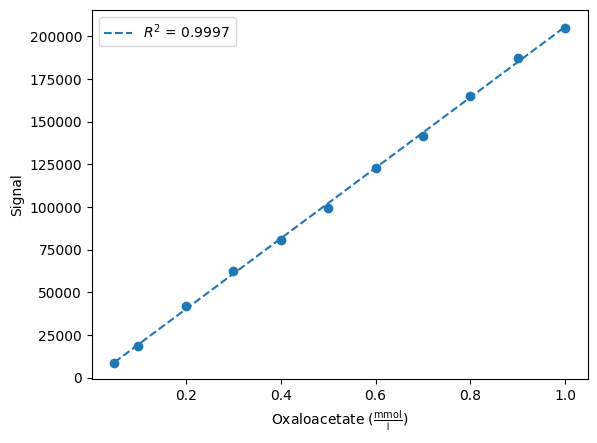

In [31]:
# Define concentrations and corresponding unit
concentrations = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
conc_unit = "mmol/L"

# Create a calibrator for the substrate
substrate_calibrator = Calibrator.from_species(
    species=substrate_species, concentrations=concentrations, conc_unit=conc_unit
)

# Plot the calibration curve
substrate_calibrator.plot()

### Create `Calibrator` for product concentration

For the concentration calculation of product a calibration factor of 199030 should be used. In this case a `Calibrator` is defined, whereas only the slope is defined.

In [32]:
product_calibrator = Calibrator(
    name="Citrate", slope=199030, conc_unit="mmol/L", chebi=chebi_citrate
)

## Read in kinetic data

It is advised to group chromatographic data in folder 

In [33]:
# Define path to data
cond1_path = "data/kinetic/substrate_10mM_co-substrate3.12mM"
cond2_path = "data/kinetic/substrate_10mM_co-substreate1.78mM"

# Define species present in the kinetic measurements
cond1_analyzer = ChromAnalyzer.read_data(cond1_path)
cond2_analyzer = ChromAnalyzer.read_data(cond2_path)

# Add species to the chromatograms
cond1_analyzer.plot_measurements()
cond2_analyzer.plot_measurements()

Besides defining the species of measurements, the reaction time can be provided to the species.

In [34]:
time_unit = "s"
reaction_times = [0, 60, 120, 180, 240, 300]

In [35]:
# Assign species to the peaks of measurements of condition 1

# Substrate
cond1_analyzer.add_species(
    name="Oxaloacetate",
    retention_time=24.35,
    chebi=chebi_oxaloacetate,
    init_conc=1.78,
    conc_unit="mmol/L",
    reaction_times=reaction_times,
    time_unit=time_unit,
)

# Product
cond1_analyzer.add_species(
    name="Citrate",
    retention_time=22.67,
    chebi=chebi_citrate,
    init_conc=0,
    conc_unit="mmol/L",
    reaction_times=reaction_times,
    time_unit=time_unit,
)

# Catalyst
cond1_analyzer.add_species(
    name="Catalyst", uniprot_id="P00395", init_conc=0.1, conc_unit="mmol/L"
)

# Co-substrate
cond1_analyzer.add_species(
    name="Acetyl-CoA", init_conc=10, conc_unit="mmol/L", chebi=chebi_acecoa
)

🏔️ Assigned 6 peaks to Oxaloacetate at 24.35 ± 0.1 min.
🏔️ Assigned 6 peaks to Citrate at 22.67 ± 0.1 min.


Species(id='413c2cc2-eb9d-46f8-bf17-6b09e697d98d', name='Acetyl-CoA', chebi=15351, molecular_weight=None, init_conc=10.0, conc_unit=Unit(id='e1856fae-9882-415b-a855-5d71d2802dd7', name='mmol / l', bases=[BaseUnit(scale=0.001, kind=Unit("mol"), exponent=1.0), BaseUnit(scale=1.0, kind=Unit("l"), exponent=-1.0)]), time_unit=None, uniprot_id=None, retention_time=None, peaks=[], concentrations=[], role=None, reaction_times=[])

In [36]:
# Assign species to the peaks of measurements of condition 2

# Substrate
cond2_analyzer.add_species(
    name="Oxaloacetate",
    retention_time=24.35,
    chebi=chebi_oxaloacetate,
    init_conc=3.12,
    conc_unit="mmol/L",
    reaction_times=reaction_times,
    time_unit=time_unit,
)

# Product
cond2_analyzer.add_species(
    name="Citrate",
    retention_time=22.67,
    chebi=chebi_citrate,
    init_conc=0,
    conc_unit="mmol/L",
    reaction_times=reaction_times,
    time_unit=time_unit,
)

# Catalyst
cond2_analyzer.add_species(
    name="Catalyst", uniprot_id="P00395", init_conc=0.1, conc_unit="mmol/L"
)

# Co-substrate
cond2_analyzer.add_species(
    name="Acetyl-CoA", init_conc=10, conc_unit="mmol/L", chebi=chebi_acecoa
)

🏔️ Assigned 6 peaks to Oxaloacetate at 24.35 ± 0.1 min.
🏔️ Assigned 6 peaks to Citrate at 22.67 ± 0.1 min.


Species(id='db316eeb-760d-4239-aa62-06544c321971', name='Acetyl-CoA', chebi=15351, molecular_weight=None, init_conc=10.0, conc_unit=Unit(id='a9f41345-4597-44c0-b40e-e6a896de6c0d', name='mmol / l', bases=[BaseUnit(scale=0.001, kind=Unit("mol"), exponent=1.0), BaseUnit(scale=1.0, kind=Unit("l"), exponent=-1.0)]), time_unit=None, uniprot_id=None, retention_time=None, peaks=[], concentrations=[], role=None, reaction_times=[])

## Add calibrators to the analyzers

Instead of adding the calibrators to each analyzer individually, a for loop can be used to iterate over all analyzers and add the calibrators.

In [37]:
# Combine all analyzers into a list
all_analyzers = [cond1_analyzer, cond2_analyzer]

# Iterate over all analyzers and add the calibrators
for analyzer in all_analyzers:
    analyzer.calibrators.append(substrate_calibrator)
    analyzer.calibrators.append(product_calibrator)

## Plot data

In [38]:
cond1_analyzer.plot_concentrations()
cond2_analyzer.plot_concentrations()

## Export data as csv

As a an option, data can always be exported as csv files.

In [39]:
cond1_analyzer.to_csv("data/kinetic/cond1.csv")
cond2_analyzer.to_csv("data/kinetic/cond2.csv")

## What comes next?

As a next development, data from the `ChromAnalyzer` will be able to export as EnzymeML files, allowing to interface different modeling and analysis tools. Having all data in the standardized form of an EnzymeML document, allows swift combination of data from different experiments with different initial conditions.

Furthermore, the showcased workflow will be made available for other chromatographic systems. 